In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'D:/EshProject/dataset/train'
valid_path = 'D:/EshProject/dataset/valid'

In [3]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# Folders in the Training Set
folders = glob('D:/EshProject/dataset/train/*')
folders

['D:/EshProject/dataset/train\\Tomato___Bacterial_spot',
 'D:/EshProject/dataset/train\\Tomato___Early_blight',
 'D:/EshProject/dataset/train\\Tomato___healthy',
 'D:/EshProject/dataset/train\\Tomato___Late_blight',
 'D:/EshProject/dataset/train\\Tomato___Leaf_Mold',
 'D:/EshProject/dataset/train\\Tomato___Septoria_leaf_spot',
 'D:/EshProject/dataset/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'D:/EshProject/dataset/train\\Tomato___Target_Spot',
 'D:/EshProject/dataset/train\\Tomato___Tomato_mosaic_virus',
 'D:/EshProject/dataset/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [8]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Training Generator
training_set = train_datagen.flow_from_directory('D:/EshProject/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('D:/EshProject/dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [14]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\devan\AppData\Local\Temp\ipykernel_14988\1141776482.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
574/574 [==============================] - 2410s 4s/step - loss: 2.6287 - accuracy: 0.6898 - val_loss: 1.7537 - val_accuracy: 0.7972
Epoch 2/10
574/574 [==============================] - 2191s 4s/step - loss: 2.0664 - accuracy: 0.7926 - val_loss: 1.4467 - val_accuracy: 0.8419
Epoch 3/10
574/574 [==============================] - 2175s 4s/step - loss: 2.1420 - accuracy: 0.8141 - val_loss: 1.4685 - val_accuracy: 0.8608
Epoch 4/10
574/574 [==============================] - 2200s 4s/step - loss: 1.8915 - accuracy: 0.8458 - val_loss: 1.9513 - val_accuracy: 0.8482
Epoch 5/10
574/574 [==============================] - 2117s 4s/step - loss: 1.9691 - accuracy: 0.8496 - val_loss: 0.9479 - val_accuracy: 0.9096
Epoch 6/10
574/574 [==============================] - 2112s 4s/step - loss: 1.7730 - accuracy: 0.8690 - val_loss: 1.1996 - val_accuracy: 0.8989
Epoch 7/10
574/574 [==============================] - 2107s 4s/step - loss: 1.6660 - accuracy: 0.8796 - val_loss: 1.4722 - val_accuracy:

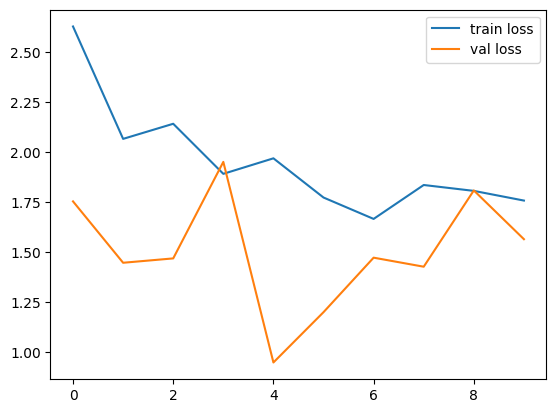

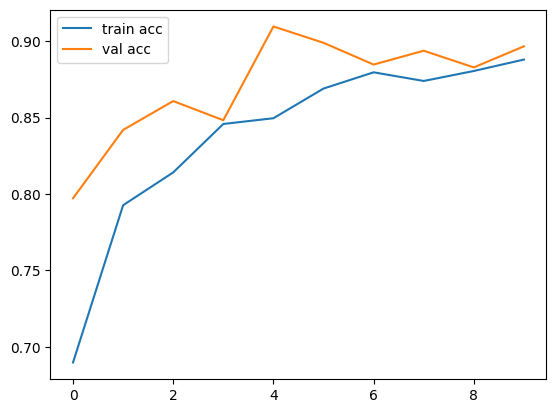

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [17]:
y_pred = model.predict(test_set)
y_pred

574/574 [==============================] - 986s 2s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.4460327e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.6749167e-34],
       ...,
       [0.0000000e+00, 3.8277891e-33, 1.4786214e-36, ..., 0.0000000e+00,
        0.0000000e+00, 1.5074327e-15],
       [4.0808255e-38, 0.0000000e+00, 1.5601048e-20, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 1, 6, ..., 6, 6, 8], dtype=int64)